# Regressão Linear - Notebook de Apoio


Este notebook apresenta conceitos fundamentais para a construção da solução 
sollicitada no exercício sobre Regressão Linear.

Aqui, são abordados os conceitos de manipulação de imagens utilizando a bibliotecas **`matplotlib`** **`PIL`** bem como a manipulação de imagens usando as bibliotecas **`NumPy`** e **`PyTorch`**. Também são apresentados os conceitos de funções **`índices`** e **`meshgrid`**.

## Parte 1 - `matplotlib`

O Matplotlib é uma biblioteca para plotagem 2D. Com ela é possível plotar pontos, funções, estatísticas e imagens. É possível também ler e escrever imagens no disco.

### Importando a biblioteca

`Nota:` quando o Matplotlib é usando dentro do Jupyter-Notebook é necessário o uso do comando `%matplotlib inline` para que os gráficos sejam mostrados.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Mostrando uma imagem no Matplotlib
Note que para mostrar uma imagem com a biblioteca Matplotlib, esta já precisa estar carregada em um objeto.

A biblioteca Matplotlib consegue mostrar tanto imagens coloridas no formato PIL quanto arrays NumPy no formato *channels last*.


#### Mostrando uma imagem no formato array numpy:

(600, 600, 3)


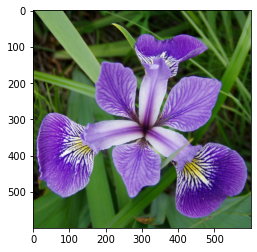

In [14]:
print(np_img.shape)
plt.imshow(np_img);

#### Manipulando o plot

Por ser uma biblioteca de plotagem, é possível manipular várias informações do plot, como grid, título, label dos eixos, tamanho da figura, dentre outras.

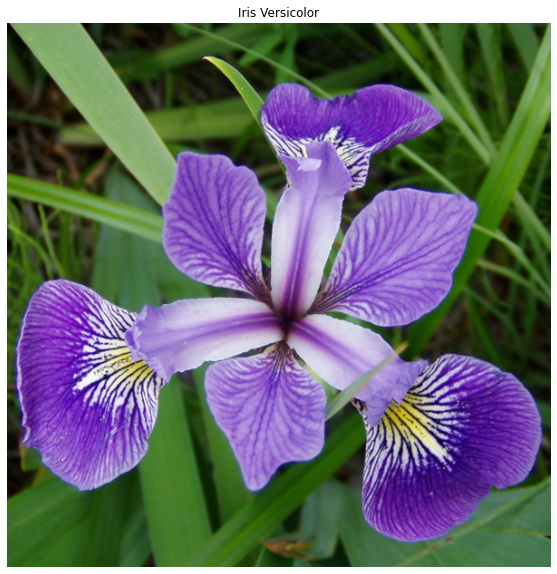

In [15]:
plt.figure(figsize=(15, 10))
plt.title("Iris Versicolor")
plt.imshow(np_img)
plt.axis('off')
plt.show()

#### Mostrando imagens monocromáticas ou grayscale (duas dimensões) no Matplotlib

In [20]:
np_img_gs = np_img.mean(axis=2).astype(np.uint8)
np_img_gs.dtype, np_img_gs.shape
np_img.shape

(600, 600, 3)

Por padrão, o Matplotlib utiliza uma tabela de cor falsa (pseudo cor) quando visualiza uma imagem de um único canal. A função colorbar() mostra a tabela de cor utilizada:

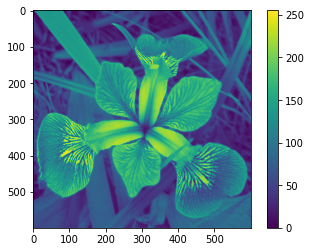

In [21]:
plt.imshow(np_img_gs)
plt.colorbar();

Para visualizar a imagem en tons de cinza, deve-se informar a tabela `gray`, no parâmetro `cmap` do `imshow`. 

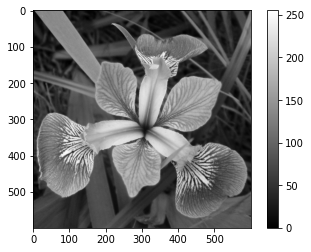

In [22]:
plt.imshow(np_img_gs, cmap='gray')
plt.colorbar()

#### Leitura de imagens com Matplotlib
Existe um **cuidado especial** quando utilizar o Matplotlib para ler imagens.
Dependendo do formato do arquivo da imagem, o arrary NumPy lido pode ser 
normalizado.

Veja o exemplo a seguir. Enquanto que a leitura via PIL preserva o tipo dos
pixels como 8 bits sem sinal (`uint8`), com valores de 0 a 255, o Matplotlib
converte para o tipo ponto flutuante 32 bits (`float32`) e normaliza entre 0 e 1: 

No exemplo a seguir, a imagem PNG possui 4 canais: (R,G,B,A) onde o último é chamado canal Alfa.

In [45]:
f = mpimg.imread('iris_petals_sepals.png')
f.shape, f.dtype, f.min(), f.max()

((303, 280, 4), dtype('float32'), 0.0, 1.0)

In [46]:
f_PIL = np.array(Image.open('iris_petals_sepals.png'))
f_PIL.shape, f_PIL.dtype, f_PIL.min(), f_PIL.max()

((303, 280, 4), dtype('uint8'), 0, 255)

Entretanto, o matplotlib consegue fazer o display dos dois tipos de imagens: uint8 e float, sendo que nesse último formato, os dados devem estar normalizados entre 0 e 1.

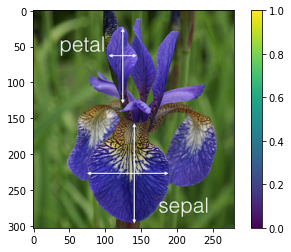

In [47]:
plt.imshow(f); plt.colorbar()

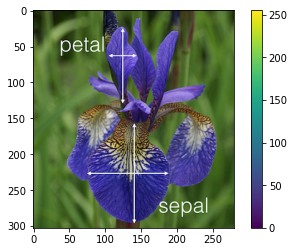

In [48]:
plt.imshow(f_PIL); plt.colorbar()

No trecho a seguir, é colocado um círculo binário no canal Alfa: um na parte central e zero na parte externa.

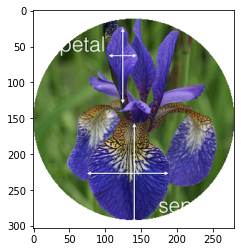

In [49]:
H,W = f.shape[:2]
r,c = np.indices((H,W))

f[:,:,3]= (r - H/2)**2 + (c - W/2)**2 < (min(H,W)/2)**2

plt.imshow(f)

## Parte 2 - `PIL`

A biblioteca PIL, ou Python Image Processing traz para o Python a capacidade de processar imagens. A biblioteca suporta vários formatos de arquivo e poderosas ferramentas de processamento de imagem.

Alguns dos usos da biblioteca são Arquivamento, fazendo processamento em lote de imagens, Exibição, suportando várias interfaces (GUIs) e Processamento, como redimensionamento, rotação, histograma, dentre outras.

### Importando a biblioteca

In [50]:
import numpy as np
from IPython.display import display
from PIL import Image

### Carregando uma imagem do disco

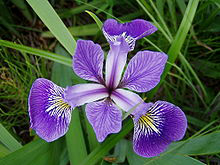

In [53]:
img = Image.open('Iris_versicolor.jpg')
img

### Estrutura de dados

O formato PIL utiliza uma classe própria e não é apropriada para o processamento
matricial. Assim, para se fazer processamento, recomenda-se converter a image para NumPy array ou PyTorch tensor.

In [54]:
type(img)
img.size, img.bits, img.format, img.mode

((220, 165), 8, 'JPEG', 'RGB')

### Mostrando uma imagem PIL

No jupyter-notebook, chamar o objeto que contém a imagem faz com que ela seja mostrada.

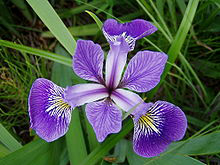

In [55]:
img

Ou também é possível usar o método `display` da classe `IPython.display`.

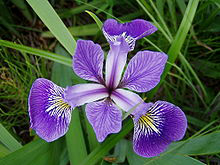

In [56]:
display(img)

Para salvar uma imagem em disco, usamos o método `save` passando como parâmetro o caminho para salvar a imagem. Caso seja necessário alterar o formato da imagem, é possível passar como parâmetro o formato desejado.

In [ ]:
img.save(base_dir + '../../Iris_versicolor_copy.png','png')

## Parte 3 - NumPy

### Transformando uma imagem em um array numpy

Para se processar imagem, é recomendado o uso do NumPy. Para transformar a imagem em um array numpy, usamos o método array da classe numpy.

In [57]:
np_img = np.array(img)

### Mostrando as dimensões da imagem
Neste caso, a imagem possui 3 dimensões: a primeira é altura da imagem, a segundo é a largura da imagem e a terceira contém os canais R, G, B da imagem.

Existem duas formas principais de representar a imagem no array:
- channels first: (channel, Height, Width)
- channels last:  (Height, Width, channel)

Neste caso, a imagem está representada no formato *channels last*

In [58]:
np_img.shape

(165, 220, 3)

Tensorflow, Theano e PyTorch podem diferir quanto a posição dos canais. Para isso podemos trocar as dimensões e passar a informação de canais para a primeira posição. Esta configuração é conhecida como channels-first.

In [59]:
np_img_cfirst = np_img.transpose(2, 0, 1)
np_img_cfirst.shape

(3, 165, 220)

In [60]:
np_img.shape, np_img.dtype, np_img.min(), np_img.max()

((165, 220, 3), dtype('uint8'), 0, 255)

### Convertendo do NumPy para PIL

É fácil converter uma imagem NumPy para PIL usando o método `fromarray`. 
É importante observar que o formato precisa estar no *channel last* antes da conversão.

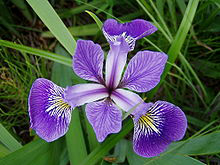

In [61]:
Image.fromarray(np_img)

In [62]:
np_img_gs = np_img.mean(axis=2).astype(np.uint8)
np_img_gs.dtype, np_img_gs.shape

(dtype('uint8'), (165, 220))

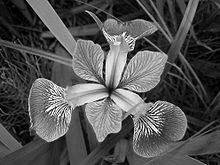

In [63]:
Image.fromarray(np_img_gs)

## Parte 4 - PyTorch
O PyTorch possui o pacote torchvision que possui diversas funções especiais para processamento de imagens, apropriadas para a preparação dos dados para treinamento de redes profundas.

In [64]:
import torch
import torchvision as tv

### Convertendo para tensor e de volta para imagem PIL

As funções de conversão para tensores e de volta para imagens PIL são implementadas
pelas classes `ToTensor` e `ToPILImage`, respectivamente.
A transformação para tensor, **automaticamente normaliza a imagem entre 0 e 1**.
Note entretanto que essas classes precisam ser inicializadas criando as funções
instanciadas, como no código a seguir.

In [65]:
img2tensor = tv.transforms.ToTensor() # instance to convert img to tensor
tensor2PIL = tv.transforms.ToPILImage() # instance to convert tensor to PIL

A seguir é feita a leitura de uma imagem jpeg colorida, convertida para NumPy array e em seguida convertida para tensor.

In [67]:
f = np.array(Image.open('Iris_versicolor.jpg'))
print('f.shape:',f.shape)
f_tensor = img2tensor(f)
print('f_tensor.shape:',f_tensor.shape)

f.shape: (165, 220, 3)
f_tensor.shape: torch.Size([3, 165, 220])


Observe que a imagem NumPy é uint8 enquanto que a imagem tensor é float normalizada entre 0 e 1:

In [68]:
print('f:',f.min(),f.max(), f.mean())
print('f_tensor:', f_tensor.min(), f_tensor.max(), f_tensor.mean())

f: 0 255 82.57667584940312
f_tensor: tensor(0.) tensor(1.) tensor(0.3238)


### Visualização de imagens de tensores

A visualização de um tensor pode ser facilmente feita pela função instanciada que converte tensor para PIL:

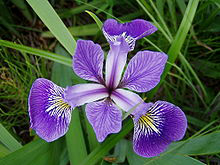

In [69]:
tensor2PIL(f_tensor)

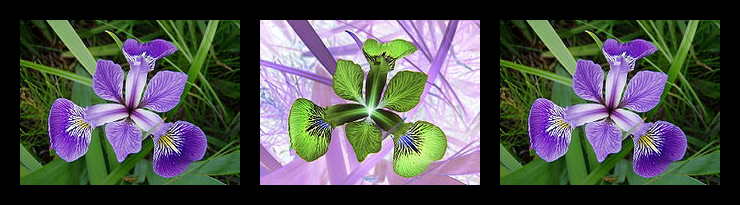

In [70]:
tensor2PIL(tv.utils.make_grid([f_tensor, 1-f_tensor, f_tensor],padding=20))

### Usando a transformação Normalize do PyTorch
A transformação `Normalize` subtrai o valor `mean` e divide pelo valor `std`. 
Se você utilizar para estes valores a média e o desvio padrão da imagem, a imagem
resultará normalidade para média zero e desvio padrão 1.

Todas as redes utilizadas na competição ImageNet normalizam as imagens subtraindo do valor [0.485, 0.456, 0.406] dos canais RGB e dividindo pelo valor [0.229, 0.224, 0.225]. Essas
imagens normalizadas não são apropriadas para visualização, pois perdeu-se a normalização
entre 0. e 1. necessária para visualização de imagens coloridas.

Para visualizar essas imagens, é necessário trazê-las de volta para os mesmos valores.
Isso pode ser feito, primeiro multiplicando-se os canais por [0.229, 0.224, 0.225] e
depois somar [0.485, 0.456, 0.406].

Os exemplos a seguir ilustram essas questões.

Primeiro, calculando a média e o desvio padrão de cada canal RGB para ser
utilizado na normalização média 0 e desvio 1:

In [71]:
fm = f_tensor.mean(dim=1).mean(dim=1)
fs = f_tensor.std(dim=1).std(dim=1)
print(fm, fs)

tensor([0.3116, 0.3403, 0.3195]) tensor([0.0615, 0.0333, 0.1034])


### Instanciando as normalizações: tanto para média 0 e desvio 1 como para ImageNet

In [72]:
norm01     = tv.transforms.Normalize(mean=fm,std=fs)
normimgnet = tv.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std =[0.229, 0.224, 0.225])

In [73]:
f_norm01=norm01(f_tensor.clone())
print(f_norm01.mean(dim=1).mean(dim=1))
print(f_norm01.std(dim=1).std(dim=1))

tensor([-3.4246e-07,  1.1162e-07,  2.1241e-07])
tensor([1.0000, 1.0000, 1.0000])


In [74]:
f_normimgnet = normimgnet(f_tensor.clone())
print(f_normimgnet.mean(dim=1).mean(dim=1))
print(f_normimgnet.std(dim=1).std(dim=1))

tensor([-0.7570, -0.5163, -0.3844])
tensor([0.2685, 0.1485, 0.4594])


### Recuperando os valores originais

In [75]:
f_orig = f_norm01 * fs.unsqueeze(1).unsqueeze(1) + fm.unsqueeze(1).unsqueeze(1)
print(f_orig.mean(1).mean(1))
print(f_orig.std(1).std(1))

tensor([0.3116, 0.3403, 0.3195])
tensor([0.0615, 0.0333, 0.1034])


In [76]:
f_orig = f_normimgnet * \
         torch.FloatTensor([0.229, 0.224, 0.225]).unsqueeze(1).unsqueeze(1) + \
         torch.FloatTensor([0.485, 0.456, 0.406]).unsqueeze(1).unsqueeze(1)
print(f_orig.mean(1).mean(1))
print(f_orig.std(1).std(1))

tensor([0.3116, 0.3403, 0.3195])
tensor([0.0615, 0.0333, 0.1034])


## Parte 5 - Funções indices e meshgrid

As funções ``indices`` e ``meshgrid`` são extremamente úteis na geração de imagens sintéticas e o seu aprendizado permite também
entender as vantagens de programação matricial, evitando-se a varredura seqüencial da imagem muito usual na programação na linguagem C.

### Operador indices em pequenos exemplos numéricos

A função ``indices`` recebe como parâmetros uma tupla com as dimensões (H,W) das matrizes a serem criadas. No exemplo a seguir, estamos
gerando matrizes de 5 linhas e 10 colunas. Esta função retorna uma tupla de duas matrizes que podem ser obtidas fazendo suas atribuições
como no exemplo a seguir onde criamos as matrizes ``r`` e ``c``, ambas de tamanho (5,10), isto é, 5 linhas e 10 colunas:

In [77]:
import numpy as np
r,c = np.indices( (5, 10) )
print('r=\n', r)
print('c=\n', c)

r=
 [[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]]
c=
 [[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


Note que a matriz ``r`` é uma matriz onde cada elemento é a sua coordenada linha e a matriz ``c`` é uma matriz onde cada elemento é
a sua coordenada coluna. Desta forma, qualquer operação matricial feita com ``r`` e ``c``, na realidade você está processando as
coordenadas da matriz. Assim, é possível gerar diversas imagens sintéticas a partir de uma função de suas coordenadas.

Como o NumPy processa as matrizes diretamente, sem a necessidade de fazer um ``for`` explícito, a notação do programa fica bem simples
e a eficiência também. O único inconveniente é o uso da memória para se calcular as matrizes de índices ``r`` e ``c``. Iremos
ver mais à frente que isto pode ser minimizado. 

Por exemplo seja a função que seja a soma de suas coordenadas $f(r,c) = r + c$:

In [78]:
f = r + c
print('f=\n', f)

f=
 [[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]


Ou ainda a função diferença entre a coordenada linha e coluna $f(r,c) = r - c$:

In [80]:
f = r - c
print('f=\n', f)

f=
 [[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
 [ 1  0 -1 -2 -3 -4 -5 -6 -7 -8]
 [ 2  1  0 -1 -2 -3 -4 -5 -6 -7]
 [ 3  2  1  0 -1 -2 -3 -4 -5 -6]
 [ 4  3  2  1  0 -1 -2 -3 -4 -5]]


Ou ainda a função $f(r,c) = (r + c) \% 2$ onde % é operador módulo. Esta função retorna 1 se a soma das coordenadas for ímpar e 0 caso contrário.
É uma imagem no estilo de um tabuleiro de xadrez de valores 0 e 1:

In [79]:
f = (r + c) % 2
print('f=\n', f)

f=
 [[0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1]]


Ou ainda a função de uma reta $ f(r,c) = (r = \frac{1}{2}c)$:

In [81]:
f = (r == c//2)
print('f=\n', f)
print('f=\n',f.astype(np.int))

f=
 [[ True  True False False False False False False False False]
 [False False  True  True False False False False False False]
 [False False False False  True  True False False False False]
 [False False False False False False  True  True False False]
 [False False False False False False False False  True  True]]
f=
 [[1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Ou ainda a função parabólica dada pela soma do quadrado de suas coordenadas 
$$ f(r,c) = r^2 + c^2 $$:

In [82]:
f = r**2 + c**2
print('f=\n', f)

f=
 [[ 0  1  4  9 16 25 36 49 64 81]
 [ 1  2  5 10 17 26 37 50 65 82]
 [ 4  5  8 13 20 29 40 53 68 85]
 [ 9 10 13 18 25 34 45 58 73 90]
 [16 17 20 25 32 41 52 65 80 97]]


   
Ou ainda a função do círculo de raio 4, com centro em (0,0) $f(r,c) = (r^2 + c^2 < 4^2)$:

In [83]:
f = ((r**2 + c**2) < 4**2)
print('f=\n', f * 1)

f=
 [[1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


### Operador indices em exemplo de imagens sintéticas

Vejamos os exemplos acima, porém gerados em imagens. A diferença será no tamanho da matriz, iremos utilizar matriz (200,300), e
a forma de visualizá-la através do ``adshow``, ao invés de imprimir os valores como fizemos acima. 
Como muitas vezes o resultado das funções poderão estar fora
da faixa 0-255 admitida pelo ``adshow``, iremos sempre normalizar os valores finais da imagem calculada para a faixa 0-255 utilizando
a função `ia636:ianormalize ianormalize` da toolbox ia636.

Gerando as coordenadas utilizando ``indices``:

Observe que o parâmetro de ``indices`` é uma tupla. Verifique o número de parêntesis utilizados:

In [ ]:
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
nb = ia.nbshow(3)

""
rn:linhas
""
cn:colunas

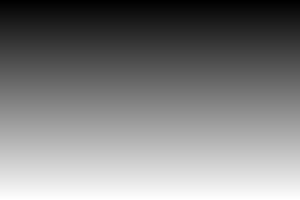
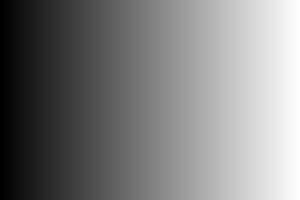

In [ ]:
r,c = np.indices( (200, 300) )
rn = ia.normalize(r)
cn = ia.normalize(c)
nb.nbshow(rn,'rn:linhas')
nb.nbshow(cn,'cn:colunas',flush=True)

### Soma

Função soma: $f(r,c) = r + c$:

""
r + c

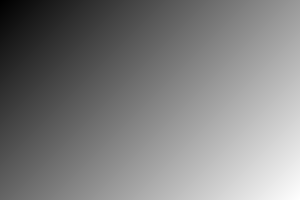

In [ ]:
f = r + c
ia.adshow(ia.normalize(f),'r + c')

### Subtração

Função subtração $f(r,c) = r - c$:

""
r - c

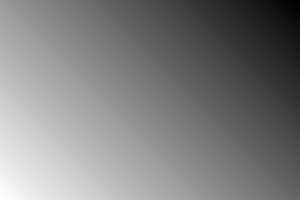

In [ ]:
f = r - c
ia.adshow(ia.normalize(f),'r - c')

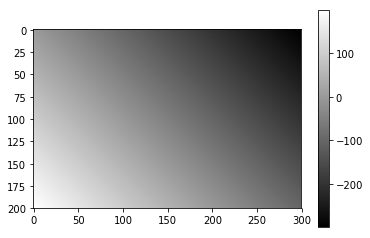

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(f,cmap='gray')
plt.colorbar()

### Xadrez

Função xadrez $f(r,c) = \frac{(r + c)}{8} \% 2$. Aqui foi feita a divisão por 8 para que o tamanho das casas do xadrez fique 8 x 8, caso
contrário é muito difícil de visualizar o efeito xadrez pois a imagem possui muitos pixels.:

""
(r//8 + c//8) % 2

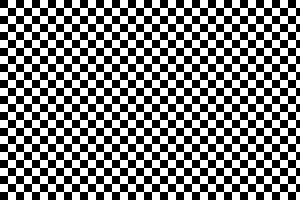

In [ ]:
f = (r//8 + c//8) % 2
ia.adshow(ia.normalize(f),'(r//8 + c//8) % 2')

### Reta

Ou ainda a função de uma reta $f(r,c) = (r = \frac{1}{2} c)$:

""
r == c//2

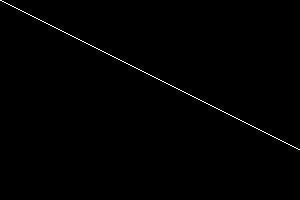

In [ ]:
f = (r == c//2)
ia.adshow(f,'r == c//2')

### Parábola

Função parabólica: $f(r,c) = r^2 + c^2$:

""
r**2 + c**2

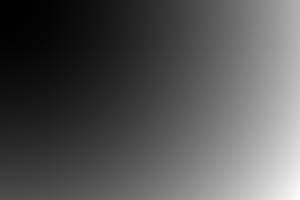

In [ ]:
f = r**2 + c**2
ia.adshow(ia.normalize(f),'r**2 + c**2')

### Círculo

Função do círculo de raio 190, $f(r,c) = (r^2 + c^2 < 190^2)$:

""
r**2 + c**2) < 190**2

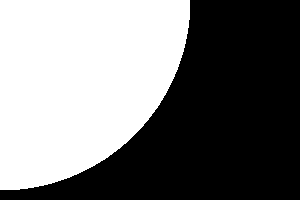

In [ ]:
f = (r**2 + c**2 < 190**2)
ia.adshow(ia.normalize(f),'r**2 + c**2) < 190**2')

### Meshgrid
   
A função ``meshgrid`` é semelhante à  função ``indices`` visto
anteriormente, porém, enquanto ``indices`` gera as coordenadas inteiras não negativas a partir de um ``shape(H,W)``, 
o ``meshgrid`` gera os valores das matrizes a partir de dois vetores de valores reais quaisquer, um para as linhas e outro para as colunas.

Veja a seguir um pequeno exemplo numérico. Para que o ``meshgrid`` fique compatível com a nossa convenção de (linhas,colunas), deve-se
usar o parâmetro ``indexing='ij'``.

In [ ]:
import numpy as np
r, c = np.meshgrid( np.array([-1.5, -1.0, -0.5, 0.0, 0.5]), 
                    np.array([ -20,  -10,    0,  10,  20, 30]), indexing='ij')
print('r=\n',r)
print('c=\n',c)

r=
 [[-1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]]
c=
 [[-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]
 [-20 -10   0  10  20  30]]


### Gerando os vetores com linspace

A função ``linspace`` gera vetor em ponto flutuante recebendo os parâmetro de valor inicial, valor final e número de pontos do vetor.
Desta forma ele é bastante usado para gerar os parâmetro para o ``meshgrid``.
 
Repetindo os mesmos valores do exemplo anterior, porém usando ``linspace``. Observe que o primeiro vetor possui 5 pontos,
começando com valor -1.5 e o valor final é 0.5 (inclusive). O segundo vetor possui 6 pontos, começando de -20 até 30:

In [ ]:
rows = np.linspace(-1.5, 0.5, 5)
cols = np.linspace(-20, 30, 6)

print('rows:', rows)
print('cols:', cols)

rows: [-1.5 -1.  -0.5  0.   0.5]
cols: [-20. -10.   0.  10.  20.  30.]


Usando os dois vetores gerados pelo ``linspace`` no ``meshgrid``:
   

In [ ]:
r, c = np.meshgrid(rows, cols, indexing='ij')
print('r = \n', r)
print('c = \n', c)

r = 
 [[-1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [-1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]]
c = 
 [[-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]
 [-20. -10.   0.  10.  20.  30.]]


Podemos agora gerar uma matriz ou imagem que seja função destes valores. Por exemplo ser o produto deles:

In [ ]:
f = r * c
print('f=\n', f)

f=
 [[ 30.  15.  -0. -15. -30. -45.]
 [ 20.  10.  -0. -10. -20. -30.]
 [ 10.   5.  -0.  -5. -10. -15.]
 [ -0.  -0.   0.   0.   0.   0.]
 [-10.  -5.   0.   5.  10.  15.]]


### Exemplo na geração da imagem sinc com meshgrid

Neste exemplo, geramos a imagem da função $ sinc(r,c)$ em duas dimensões, nos intervalos na vertical, de -5 a 5 e na
horizontal de -6 a 6. A função sinc é uma função trigonométrica que pode ser utilizada para filtragens.

A equação é dada por:

$$    sinc(r,c) = \frac{\sin(r^2 + c^2)}{r^2 + c^2}, \text{para\ } -5 \leq r \leq 5, -6 \leq c \leq 6 $$

Na origem, tanto r como c são zeros, resultando uma divisão por zero. Entretanto pela teoria dos limites, $\frac{sin(x)}{x}$ é
igual a 1 quando $x$ é igual a zero.
Uma forma de se obter isto em ponto flutuante é somar tanto no numerador como no denominador um *epsilon*, que é a
menor valor em ponto flutuante. Epsilon pode ser obtido pela função ``np.spacing``. 

""
Função sinc: sen(r² + c²)/(r²+c²) em duas dimensões

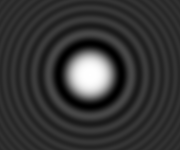

In [ ]:
e = np.spacing(1) # epsilon to avoid 0/0
rows = np.linspace(-5.0, 5.0, 150) # coordenadas das linhas
cols = np.linspace(-6.0, 6.0, 180) # coordenadas das colunas
r, c = np.meshgrid(rows, cols, indexing='ij') # Grid de coordenadas estilo numpy
z = np.sin(r**2 + c**2 + e) / (r**2 + c**2 + e) # epsilon is added to avoid 0/0
ia.adshow(ia.normalize(z),'Função sinc: sen(r² + c²)/(r²+c²) em duas dimensões')

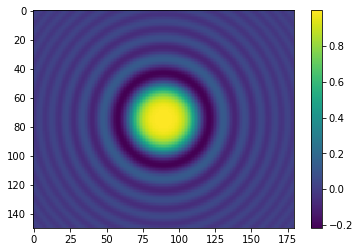

In [ ]:
plt.imshow(z)
plt.colorbar()

### Exemplo na geração da imagem sinc com indices

Outra forma de gerar a mesma imagem, usando a função ``indices`` é processar os
indices de modo a gerar os mesmos valores relativos à grade de espaçamento regular
acima, conforme ilustrado abaixo:

""
Função sinc: sin(r² + c²)/(r²+c²) em duas dimensões

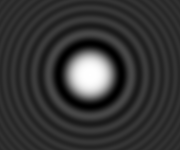

In [ ]:
n_rows = len(rows)
n_cols = len(cols)
r,c = np.indices((n_rows,n_cols))
r = -5. + 10.*r.astype(float)/(n_rows-1)
c = -6. + 12.*c.astype(float)/(n_cols-1)
zi = np.sin(r**2 + c**2 + e) / (r**2 + c**2 + e) # epsilon is addes to avoid 0/0
ia.adshow(ia.normalize(zi),'Função sinc: sin(r² + c²)/(r²+c²) em duas dimensões')   

Verificando que as duas funções são iguais:

In [ ]:
print('Máxima diferença entre z e zi?', abs(z - zi).max())

Máxima diferença entre z e zi? 1.22124532709e-15


In [ ]:
np.exp(-1/2.)

0.60653065971263342

### Documentação Oficial Numpy
 
- [meshgrid](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)
- [indices](http://docs.scipy.org/doc/numpy/reference/generated/numpy.indices.html) 
- [linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)